# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\User\Desktop\Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [4]:
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [5]:
data = data.drop('Country',axis=1)

In [6]:
pd.set_option('display.max_columns', len(data.columns))
print(len(data.columns) , 'columns in Data Frame')

data.head()

21 columns in Data Frame


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [7]:
data.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [8]:
data.isnull().sum()

Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [9]:
data.dtypes

Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [10]:
for i in data.columns:
    if (data[i].dtypes == 'object'):
        data[i] = data[i].fillna(value=data[i].mode()[0])
    else:
        data[i] = data[i].fillna(value=data[i].mean())

In [11]:
data.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
col = []
for i in data:
    if data[i].dtypes!=object:
        col.append(i)
col

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Life expectancy ']

In [14]:
abs(data.corr()['Life expectancy '][:-1])*100

Year                               16.962259
Adult Mortality                    69.635931
infant deaths                      19.653500
Alcohol                            39.159834
percentage expenditure             38.179117
Hepatitis B                        20.377144
Measles                            15.757382
 BMI                               55.925530
under-five deaths                  22.250302
Polio                              46.157378
Total expenditure                  20.798062
Diphtheria                         47.541838
 HIV/AIDS                          55.645682
GDP                                43.049302
Population                          1.963770
 thinness  1-19 years              47.216188
 thinness 5-9 years                46.662921
Income composition of resources    69.248280
Schooling                          71.506634
Name: Life expectancy , dtype: float64

In [15]:
len(abs(data.corr()['Life expectancy '][:-1])*100)

19

In [16]:
sum(abs(data.corr()['Life expectancy '][:-1])*100)/len(abs(data.corr()['Life expectancy '][:-1])*100)

39.35216082583699

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = data[[
    
 'Adult Mortality',
 ' BMI ',
#'Polio',
#'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
#' thinness 5-9 years',
#'Income composition of resources',
#'Schooling' 
]]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,3.268823,Adult Mortality
1,2.258936,BMI
2,1.534466,HIV/AIDS
3,1.455820,GDP
4,2.059206,thinness 1-19 years


In [18]:
data = data.drop(data[['Polio', 'Diphtheria ', ' thinness 5-9 years',  'Income composition of resources',  
                       'Schooling']], axis = 1)

data

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,8.18,0.1,612.696514,327582.0,17.5,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,7.13,33.6,454.366654,12777511.0,9.4,44.3
2934,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,6.52,36.7,453.351155,12633897.0,9.8,44.5
2935,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,6.53,39.8,57.348340,125525.0,1.2,44.8
2936,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,6.16,42.1,548.587312,12366165.0,1.6,45.3


In [19]:
data.dtypes

Year                        int64
Status                     object
Adult Mortality           float64
infant deaths               int64
Alcohol                   float64
percentage expenditure    float64
Hepatitis B               float64
Measles                     int64
 BMI                      float64
under-five deaths           int64
Total expenditure         float64
 HIV/AIDS                 float64
GDP                       float64
Population                float64
 thinness  1-19 years     float64
Life expectancy           float64
dtype: object

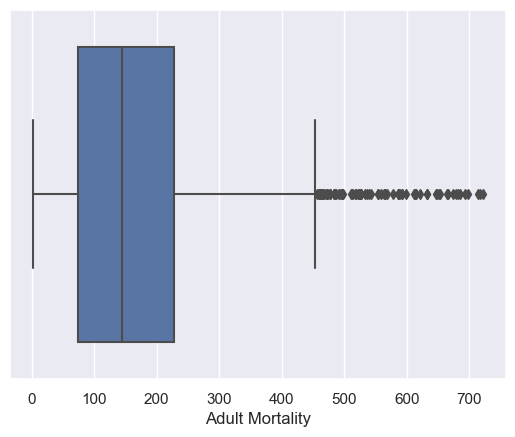

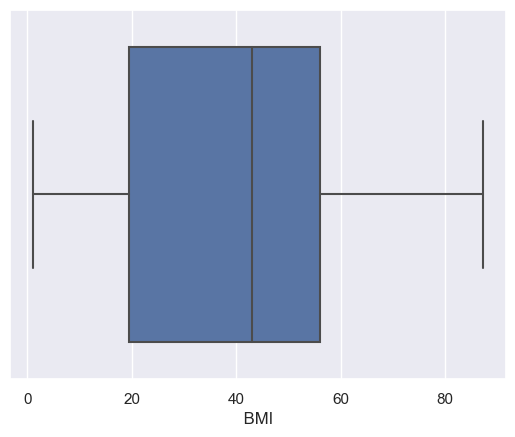

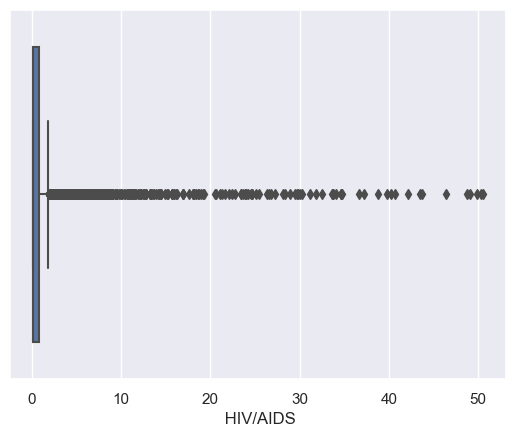

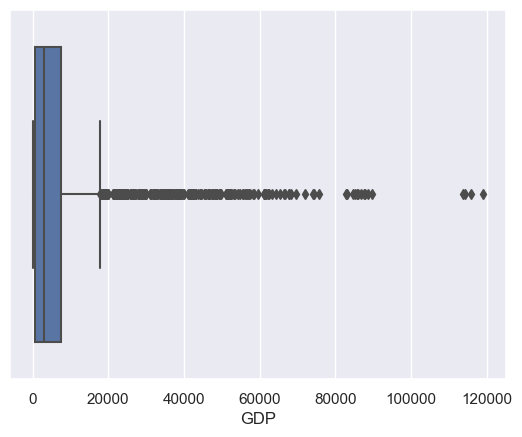

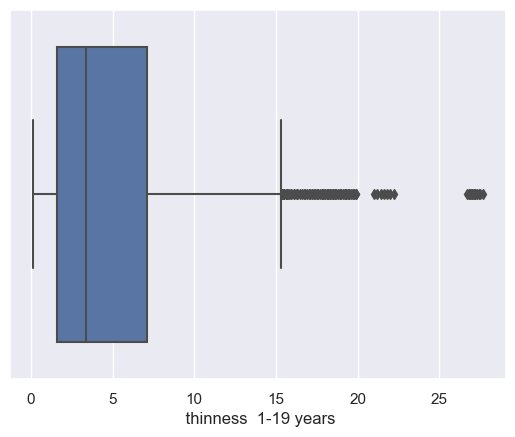

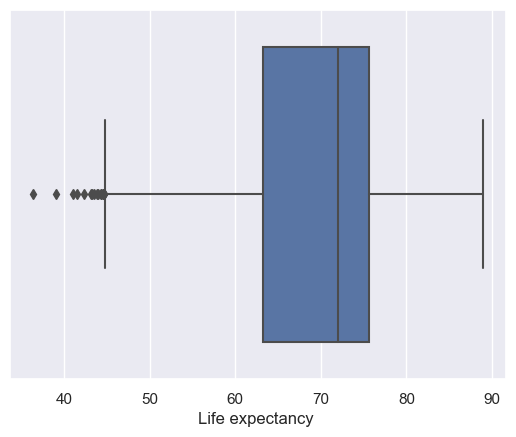

In [20]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 'Life expectancy ']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [21]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [22]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 'Life expectancy ']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

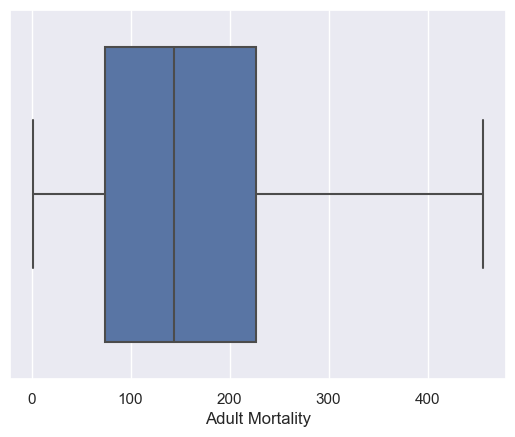

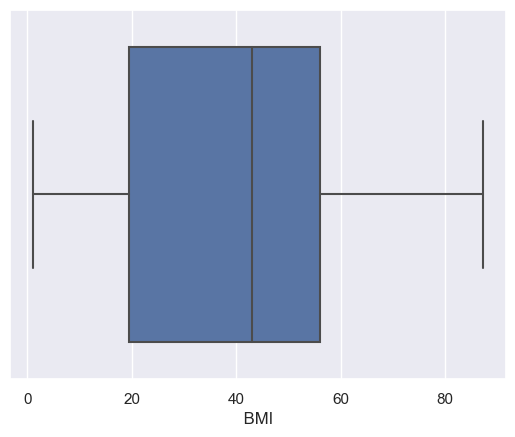

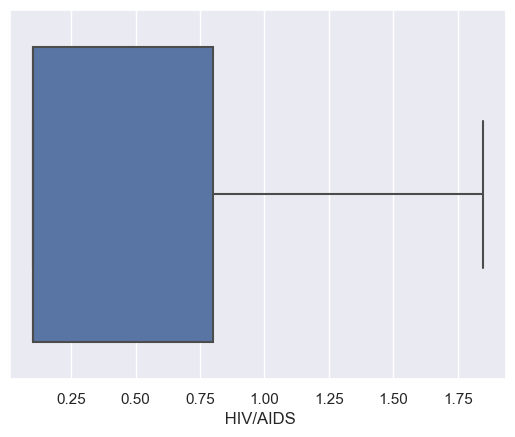

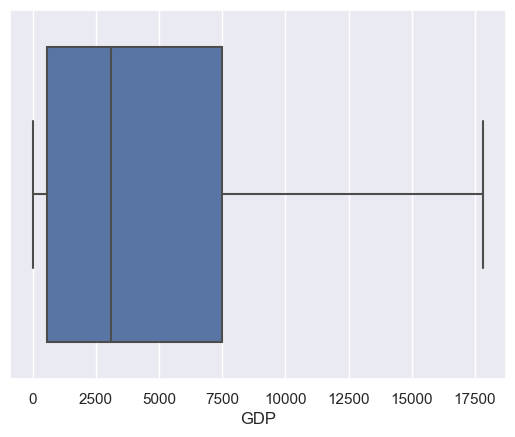

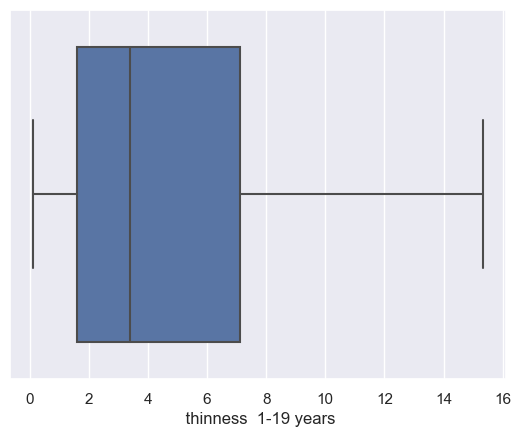

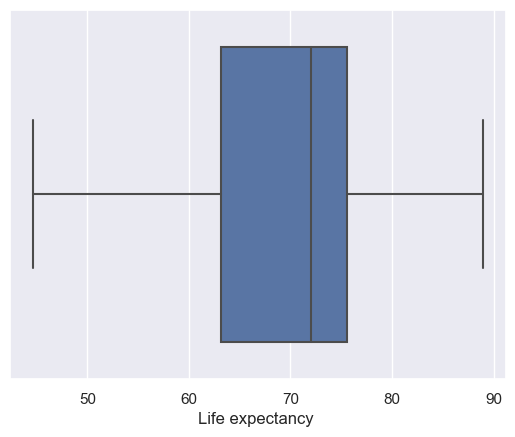

In [23]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 'Life expectancy ']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [24]:
data.describe(include='all')

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Life expectancy
count,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.518720,NaN,162.024154,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,5.938190,0.536215,5143.824919,1.275338e+07,4.705293,69.234802
std,4.613841,NaN,115.483835,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,2.400274,0.693393,5596.911140,5.381546e+07,3.930224,9.479612
min,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,0.370000,0.100000,1.681350,3.400000e+01,0.100000,44.600000
25%,2004.000000,NaN,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,4.370000,0.100000,580.486996,4.189172e+05,1.600000,63.200000
50%,2008.000000,NaN,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,5.938190,0.100000,3116.561755,3.675929e+06,3.400000,72.000000
75%,2012.000000,NaN,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,7.330000,0.800000,7483.158469,1.275338e+07,7.100000,75.600000


In [25]:
data.dtypes

Year                        int64
Status                     object
Adult Mortality           float64
infant deaths               int64
Alcohol                   float64
percentage expenditure    float64
Hepatitis B               float64
Measles                     int64
 BMI                      float64
under-five deaths           int64
Total expenditure         float64
 HIV/AIDS                 float64
GDP                       float64
Population                float64
 thinness  1-19 years     float64
Life expectancy           float64
dtype: object

In [26]:
data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [27]:
data['Status'] = data['Status'].map({'Developing':1,'Developed':0})

In [28]:
data.dtypes

Year                        int64
Status                      int64
Adult Mortality           float64
infant deaths               int64
Alcohol                   float64
percentage expenditure    float64
Hepatitis B               float64
Measles                     int64
 BMI                      float64
under-five deaths           int64
Total expenditure         float64
 HIV/AIDS                 float64
GDP                       float64
Population                float64
 thinness  1-19 years     float64
Life expectancy           float64
dtype: object

In [29]:
data.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Life expectancy
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,8.16,0.1,584.259210,33736494.0,15.35,65.0
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,8.18,0.1,612.696514,327582.0,15.35,59.9
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,8.13,0.1,631.744976,31731688.0,15.35,59.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,8.52,0.1,669.959000,3696958.0,15.35,59.5
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,7.87,0.1,63.537231,2978599.0,15.35,59.2


In [30]:
X = data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [32]:
inputs_scaled = scaler.transform(X)

inputs_scaled

array([[ 1.6217623 ,  0.45939851,  0.87452096, ..., -0.81479619,
         0.38997511,  2.70888393],
       [ 1.40498625,  0.45939851,  0.94380652, ..., -0.80971443,
        -0.23093564,  2.70888393],
       [ 1.1882102 ,  0.45939851,  0.91782444, ..., -0.80631046,
         0.35271542,  2.70888393],
       ...,
       [-1.19632639,  0.45939851, -0.77101101, ..., -0.90895537,
        -0.23469091, -0.89203308],
       [-1.41310244,  0.45939851,  2.55036537, ..., -0.82117077,
        -0.00719637, -0.79024037],
       [-1.62987849,  0.45939851,  2.55036537, ..., -0.82139029,
        -0.00987104,  1.60188824]])

In [33]:
data = pd.DataFrame(inputs_scaled, columns=X.columns)

data

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years
0,1.621762,0.459399,0.874521,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,0.925806,-0.629209,-0.814796,0.389975,2.708884
1,1.404986,0.459399,0.943807,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,0.934140,-0.629209,-0.809714,-0.230936,2.708884
2,1.188210,0.459399,0.917824,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,0.913306,-0.629209,-0.806310,0.352715,2.708884
3,0.971434,0.459399,0.952467,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,1.075815,-0.629209,-0.799482,-0.168315,2.708884
4,0.754658,0.459399,0.978449,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,0.804966,-0.629209,-0.907849,-0.181666,2.708884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,0.459399,2.550365,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,0.496616,1.895041,-0.838008,0.000449,1.194717
2934,-0.979550,0.459399,2.550365,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,0.242435,1.895041,-0.838190,-0.002221,1.296510
2935,-1.196326,0.459399,-0.771011,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,0.246602,1.895041,-0.908955,-0.234691,-0.892033
2936,-1.413102,0.459399,2.550365,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,0.092426,1.895041,-0.821171,-0.007196,-0.790240


In [34]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)

In [38]:
from sklearn import metrics

mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)


y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)


results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,3.191431,3.038827
1,MSE,17.509469,15.599826
2,RMSE,4.184432,3.949662
3,R2,0.806844,0.819674


In [39]:
data

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years
0,1.621762,0.459399,0.874521,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,0.925806,-0.629209,-0.814796,0.389975,2.708884
1,1.404986,0.459399,0.943807,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,0.934140,-0.629209,-0.809714,-0.230936,2.708884
2,1.188210,0.459399,0.917824,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,0.913306,-0.629209,-0.806310,0.352715,2.708884
3,0.971434,0.459399,0.952467,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,1.075815,-0.629209,-0.799482,-0.168315,2.708884
4,0.754658,0.459399,0.978449,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,0.804966,-0.629209,-0.907849,-0.181666,2.708884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,0.459399,2.550365,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,0.496616,1.895041,-0.838008,0.000449,1.194717
2934,-0.979550,0.459399,2.550365,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,0.242435,1.895041,-0.838190,-0.002221,1.296510
2935,-1.196326,0.459399,-0.771011,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,0.246602,1.895041,-0.908955,-0.234691,-0.892033
2936,-1.413102,0.459399,2.550365,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,0.092426,1.895041,-0.821171,-0.007196,-0.790240


# Random Forest

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
regRF = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [41]:
regRF = RandomForestRegressor()

regRF.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = regRF.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [43]:
result = evaluate(regRF, X_test, y_test)

  Metric      Train       Test
0    MAE   0.478594   1.135138
1    MSE   0.580090   3.265795
2   RMSE   0.761636   1.807151
3     R2  99.360074  96.224906


Random Forest Optimized

In [44]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [45]:
rf_random = RandomizedSearchCV(estimator = regRF, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [46]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80}

In [47]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

  Metric      Train       Test
0    MAE   0.478594   1.134820
1    MSE   0.580090   3.320260
2   RMSE   0.761636   1.822158
3     R2  99.360074  96.161948


# Support Vector 

In [48]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.svm import SVR

base_model= SVR()
base_model.fit(X_train,y_train)
base_result=evaluate(base_model,X_test,y_test)

  Metric      Train       Test
0    MAE   0.478594   7.485332
1    MSE   0.580090  96.250308
2   RMSE   0.761636   9.810724
3     R2  99.360074 -11.260487


#Support Vector Optimized

In [50]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] 
C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
epsilon = [0.1 , 0.01, 0.001, 0.0001]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [51]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)

svr_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'epsilon': [0.1, 0.01, 0.001, 0.0001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [52]:
svr_random.best_params_

{'kernel': 'sigmoid', 'gamma': 'scale', 'epsilon': 0.01, 'C': 10}

In [53]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

  Metric      Train           Test
0    MAE   0.478594     168.409174
1    MSE   0.580090  517996.282673
2   RMSE   0.761636     719.719586
3     R2  99.360074 -598677.494703


# Catboost

In [57]:
from catboost import CatBoostRegressor

In [58]:
def evaluate(model, X_test, y_test):
    
    pd.options.display.float_format = '{:.4f}'.format
    
    
    y_pred_test=model.predict(X_test)
    mae_test=metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test=metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test=np.sqrt(mse_test)
    r2_test=metrics.r2_score(y_test, y_pred_test)
    
    
    y_pred_train=model.predict(X_train)
    mae_train=metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train=metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train=np.sqrt(mse_train)
    r2_train=metrics.r2_score(y_train, y_pred_train)
    
    
    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [59]:
catboost_model=CatBoostRegressor()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.046861
0:	learn: 9.1943372	total: 150ms	remaining: 2m 30s
1:	learn: 8.8796237	total: 153ms	remaining: 1m 16s
2:	learn: 8.5725949	total: 156ms	remaining: 51.8s
3:	learn: 8.2677208	total: 158ms	remaining: 39.4s
4:	learn: 7.9939840	total: 161ms	remaining: 32s
5:	learn: 7.7083372	total: 164ms	remaining: 27.1s
6:	learn: 7.4569437	total: 166ms	remaining: 23.6s
7:	learn: 7.2158604	total: 169ms	remaining: 20.9s
8:	learn: 6.9874827	total: 171ms	remaining: 18.9s
9:	learn: 6.7682456	total: 174ms	remaining: 17.2s
10:	learn: 6.5540050	total: 177ms	remaining: 15.9s
11:	learn: 6.3484668	total: 180ms	remaining: 14.8s
12:	learn: 6.1502618	total: 183ms	remaining: 13.9s
13:	learn: 5.9772500	total: 185ms	remaining: 13.1s
14:	learn: 5.8130902	total: 188ms	remaining: 12.3s
15:	learn: 5.6495022	total: 191ms	remaining: 11.7s
16:	learn: 5.4960559	total: 193ms	remaining: 11.2s
17:	learn: 5.3597797	total: 196ms	remaining: 10.7s
18:	learn: 5.2283794	total: 198ms	remaining: 10.2s
19:	learn: 

In [60]:
result_catboost=evaluate(catboost_model, X_test, y_test)

  Metric   Train    Test
0    MAE  0.6365  1.1791
1    MSE  0.8029  3.0764
2   RMSE  0.8961  1.7540
3     R2 99.1142 96.4438


Catboost Optimized

In [61]:
param_distributions = {
    
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)
    
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

catboost_randomized=RandomizedSearchCV(catboost_model, param_distributions=param_distributions, cv=5, n_iter=10, random_state=42)

catboost_randomized.fit(X_train, y_train)

0:	learn: 8.7996203	total: 5.32ms	remaining: 261ms
1:	learn: 8.2984383	total: 8.55ms	remaining: 205ms
2:	learn: 7.8002987	total: 11.1ms	remaining: 174ms
3:	learn: 7.3404185	total: 12.7ms	remaining: 146ms
4:	learn: 6.9459952	total: 14.2ms	remaining: 128ms
5:	learn: 6.6388882	total: 15.8ms	remaining: 116ms
6:	learn: 6.3380664	total: 18.3ms	remaining: 112ms
7:	learn: 6.0478604	total: 20.3ms	remaining: 107ms
8:	learn: 5.7962359	total: 21.9ms	remaining: 99.6ms
9:	learn: 5.5684131	total: 23.4ms	remaining: 93.6ms
10:	learn: 5.3075775	total: 24.9ms	remaining: 88.4ms
11:	learn: 5.1033141	total: 26.5ms	remaining: 83.8ms
12:	learn: 4.9136998	total: 28ms	remaining: 79.6ms
13:	learn: 4.7487148	total: 29.6ms	remaining: 76.1ms
14:	learn: 4.6148862	total: 31.2ms	remaining: 72.7ms
15:	learn: 4.4620182	total: 33ms	remaining: 70.2ms
16:	learn: 4.3207105	total: 34.6ms	remaining: 67.2ms
17:	learn: 4.1993727	total: 36.3ms	remaining: 64.5ms
18:	learn: 4.0914090	total: 37.8ms	remaining: 61.6ms
19:	learn: 4.00

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000175B7139B50>,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [65]:
print('Best parameters for CatBoost model:', catboost_randomized.best_params_)

Best parameters for CatBoost model: {'learning_rate': 0.1, 'l2_leaf_reg': 11.333333333333334, 'iterations': 500, 'depth': 5}


In [66]:
optimized_catboost=catboost_randomized.best_estimator_

In [67]:
best_catboost_result = evaluate(optimized_catboost, X_test, y_test)

  Metric   Train    Test
0    MAE  0.9482  1.2993
1    MSE  1.8024  3.5594
2   RMSE  1.3425  1.8866
3     R2 98.0116 95.8855


# XGB model

In [73]:
from xgboost import XGBRegressor

In [78]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
result_xgb_reg = evaluate(xgb_reg, X_test, y_test)

  Metric   Train    Test
0    MAE  0.2139  1.2202
1    MSE  0.0970  3.3095
2   RMSE  0.3114  1.8192
3     R2 99.8930 96.1744


XGB Model Optimized

In [91]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), 
    'colsample_bytree': np.linspace(0.5, 1, num=6),
    'gamma': [0, 1, 5]

}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [92]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
            

In [93]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [94]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

  Metric   Train    Test
0    MAE  0.9795  1.3862
1    MSE  1.8468  3.9231
2   RMSE  1.3590  1.9807
3     R2 97.9627 95.4651


# Light GBM

In [86]:
from lightgbm import LGBMRegressor

In [89]:
lgb_reg = LGBMRegressor()
lgb_reg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2541
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 15
[LightGBM] [Info] Start training from score 69.288681


LGBMRegressor()

In [90]:
result_lgb = evaluate(lgb_reg, X_test, y_test)

  Metric   Train    Test
0    MAE  0.6959  1.1911
1    MSE  1.0558  3.2473
2   RMSE  1.0275  1.8020
3     R2 98.8353 96.2463


LGB Model Optimized

In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [100]:
random_search_lgb = RandomizedSearchCV(lgb_reg,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2541
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 15
[LightGBM] [Info] Start training from score 69.288681


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [101]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [102]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)

  Metric   Train    Test
0    MAE  7.0825  6.9483
1    MSE 75.4871 71.6983
2   RMSE  8.6883  8.4675
3     R2 16.7264 17.1204


# Stacking

In [103]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [104]:
base_regressors = [
    XGBRegressor(),
    RandomForestRegressor()
]

In [105]:
meta_regressor = CatBoostRegressor()

In [106]:
from mlxtend.regressor import StackingCVRegressor

stacking_regressor = StackingCVRegressor(
    regressors=base_regressors,
    meta_regressor=meta_regressor,
    cv=5,
    random_state=42
)

In [107]:
stacking_regressor.fit(X_train, y_train)

Learning rate set to 0.046861
0:	learn: 9.1215835	total: 1.56ms	remaining: 1.56s
1:	learn: 8.7421452	total: 2.82ms	remaining: 1.41s
2:	learn: 8.3839254	total: 3.69ms	remaining: 1.23s
3:	learn: 8.0414933	total: 4.82ms	remaining: 1.2s
4:	learn: 7.7126412	total: 5.99ms	remaining: 1.19s
5:	learn: 7.3995391	total: 7.16ms	remaining: 1.19s
6:	learn: 7.1050376	total: 8.32ms	remaining: 1.18s
7:	learn: 6.8226576	total: 9.46ms	remaining: 1.17s
8:	learn: 6.5554321	total: 10.9ms	remaining: 1.2s
9:	learn: 6.3054251	total: 12.2ms	remaining: 1.21s
10:	learn: 6.0601901	total: 13.5ms	remaining: 1.21s
11:	learn: 5.8279229	total: 14.6ms	remaining: 1.21s
12:	learn: 5.6107952	total: 15.8ms	remaining: 1.2s
13:	learn: 5.3996698	total: 17ms	remaining: 1.2s
14:	learn: 5.1979626	total: 18.1ms	remaining: 1.19s
15:	learn: 5.0087996	total: 19.3ms	remaining: 1.19s
16:	learn: 4.8313197	total: 20.5ms	remaining: 1.18s
17:	learn: 4.6623619	total: 21.6ms	remaining: 1.18s
18:	learn: 4.5053057	total: 22.7ms	remaining: 1.17

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x00000175B7141070>,
                    random_state=42,
                    regressors=[XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gam...
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
         

In [108]:
result_stacking=evaluate(stacking_regressor, X_train, y_train)

  Metric   Train    Test
0    MAE  0.6329  0.6329
1    MSE  0.9590  0.9590
2   RMSE  0.9793  0.9793
3     R2 98.9421 98.9421


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [3]:
import pandas as pd

data = {
    'Model': ['Linear Regression', 'Random State', 'Random State Optimized', 
              'Support Vector', 'Support Vector Optimized', 
              'Catboost', 'Catboost Optimized', 
              'XGB', 'XGB Optimized', 
              'LGB', 'LGB Optimized', 
              'Stacking'],
    'Train R2_score': [80.6, 99.3, 99.3, 99.4, 99.3, 99.1, 98.01, 99.8, 97.6, 98.8, 16.7, 98],
    'Test R2_score': [82, 96.2, 96.1, -11, -598677, 96.4, 95.8, 96.1, 95.4, 96.2, 17.1, 98]
}


df = pd.DataFrame(data)

df


,Model,Train R2_score,Test R2_score
0,Linear Regression,80.60,82.0
1,Random State,99.30,96.2
2,Random State Optimized,99.30,96.1
3,Support Vector,99.40,-11.0
4,Support Vector Optimized,99.30,-598677.0
5,Catboost,99.10,96.4
6,Catboost Optimized,98.01,95.8
7,XGB,99.80,96.1
8,XGB Optimized,97.60,95.4
9,LGB,98.80,96.2
